## **0. 라이브러리 불러오기**

In [ ]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## **1. 마스터 테이블 불러오기**

In [2]:
## 데이터 전처리 통합 마스터 테이블 불러오기
prep = pd.read_csv("merged_olist.csv")

In [3]:
prep

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,is_black_friday,is_carnival,has_photos,has_description,description_length,has_text_review,is_same_state,pg_processing_days,seller_processing_days,delivery_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,False,False,True,True,268,True,True,0.01,2.37,6.06
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,False,False,True,True,178,True,False,1.28,0.46,12.04
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,False,False,True,True,232,False,False,0.01,0.20,9.18
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,False,False,True,True,468,True,False,0.01,3.75,9.45
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,False,True,True,True,316,False,True,0.04,0.89,1.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85592,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1,ac35486adb7b02598c182c2ff2e05254,...,False,False,True,True,1517,False,True,0.00,1.06,7.16
85593,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,False,False,True,True,828,True,True,0.01,1.43,20.76
85594,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,False,False,True,True,1893,True,False,0.01,3.75,13.33
85595,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,False,False,True,True,1893,True,False,0.01,3.75,13.33


In [4]:
prep['order_status'].unique()

array(['delivered'], dtype=object)

## **2. 평균 리뷰 vs 불만족 비율**

| 지표   | 평균 리뷰 점수 | 불만족 리뷰 비율  |
|--------|---------------|-----------------|
| 성격   | 중앙 집중      | 꼬리 강조  |
| 안정성 | ??           | 상대적으로 변동 큼|
| 소수 불만 반영 | 잘 안됨 | 잘 됨|
|운영 리스크 탐지 | 약함 | 강함|

#### **2-1. seller_id별 데이터 만들기**

In [11]:
prep.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_city', 'seller_state',
       'review_score', 'review_comment_message', 'customer_unique_id',
       'customer_city', 'customer_state', 'payment_sequential',
       'payment_types', 'payment_installments', 'payment_value_total',
       'is_black_friday', 'is_carnival', 'has_photos', 'has_description',
       'description_length', 'has_text_review', 'is_same_state',
       'pg_processing_days', 'seller_processing_days', 'delivery_days'],
      dtype='object')

In [12]:
seller_profile = (
    prep.groupby("seller_id")
    .agg(
        # 주문 규모
        total_orders=("order_id", "nunique"),

        # 리뷰 지표
        avg_review_score=("review_score", "mean"),
        negative_review_ratio=(
            "review_score",
            lambda x: (x <= 3).mean()
        ),

        # 출고/배송 지표
        avg_processing_days=("seller_processing_days", "mean")
    )
    .reset_index()
)

seller_profile

,seller_id,total_orders,avg_review_score,negative_review_ratio,avg_processing_days
0,0015a82c2db000af6aaaf3ae2ecb0532,1,NaN,0.000000,5.080000
1,001cca7ae9ae17fb1caed9dfb1094831,158,3.679012,0.141304,2.198913
2,002100f778ceb8431b7a1020ff7ab48f,43,4.090909,0.063830,3.713191
3,003554e2dce176b5555353e4f3555ac8,1,NaN,0.000000,0.520000
4,004c9cd9d87a3c30c522c48c4fc07416,118,3.918367,0.116279,1.445194
...,...,...,...,...,...
2810,ffc470761de7d0232558ba5e786e57b7,24,4.090909,0.115385,1.151154
2811,ffdd9f82b9a447f6f8d4b91554cc7dd3,15,4.100000,0.187500,4.192500
2812,ffeee66ac5d5a62fe688b9d26f83f534,8,4.000000,0.125000,8.530000
2813,fffd5413c0700ac820c7069d66d98c89,37,3.687500,0.135135,1.936486


In [45]:
## 기술통계 확인
seller_profile.describe()

,total_orders,avg_review_score,negative_review_ratio,avg_processing_days,log_neg_ratio,slow_seller
count,2815.000000,2292.000000,2815.000000,2815.000000,2815.000000,2815.000000
mean,26.968384,3.909300,0.124148,3.109518,0.104066,0.250089
std,83.845685,1.038177,0.202775,3.487782,0.152649,0.433141
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.473319,0.000000,1.349364,0.000000,0.000000
50%,6.000000,4.000000,0.040541,2.150000,0.039740,0.000000
75%,19.000000,4.800000,0.166667,3.581727,0.154151,0.500000
max,1476.000000,5.000000,1.000000,48.220000,0.693147,1.000000


#### **2-2. 시각화: 기본 분포 확인**

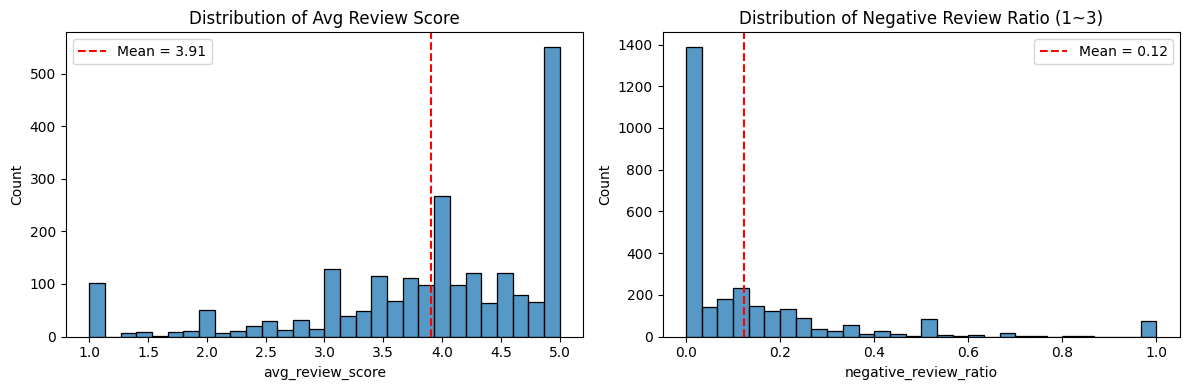

In [ ]:
## 기본 분포 확인

fig, axes = plt.subplots(1, 2, figsize=(12,4))

# 평균 계산
mean_avg_score = seller_profile["avg_review_score"].mean()
mean_neg_ratio = seller_profile["negative_review_ratio"].mean()

# 1) 평균 리뷰 점수 분포
sns.histplot(seller_profile["avg_review_score"], bins=30, ax=axes[0])
axes[0].axvline(
    mean_avg_score,
    color="red",
    linestyle="--",
    label=f"Mean = {mean_avg_score:.2f}"
)
axes[0].set_title("Distribution of Avg Review Score")
axes[0].legend()

# 2) 불만족 리뷰 비율 분포
sns.histplot(seller_profile["negative_review_ratio"], bins=30, ax=axes[1])
axes[1].axvline(
    mean_neg_ratio,
    color="red",
    linestyle="--",
    label=f"Mean = {mean_neg_ratio:.2f}"
)
axes[1].set_title("Distribution of Negative Review Ratio (1~3)")
axes[1].legend()

plt.tight_layout()
plt.show()


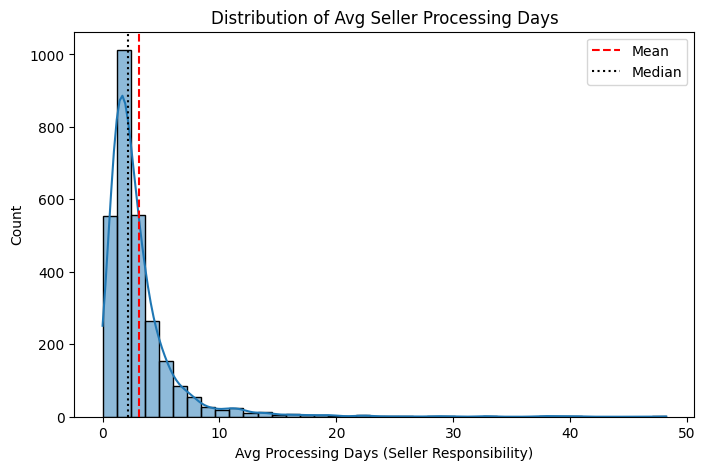

In [ ]:
## 판매자별 평균 출고일 분포
# 평균 > 중앙값 => 지연 판매자 소수 집중 필요

plt.figure(figsize=(8,5))
sns.histplot(
    seller_profile["avg_processing_days"],
    bins=40,
    kde=True
)
plt.axvline(
    seller_profile["avg_processing_days"].mean(),
    color="red",
    linestyle="--",
    label="Mean"
)
plt.axvline(
    seller_profile["avg_processing_days"].median(),
    color="black",
    linestyle=":",
    label="Median"
)
plt.title("Distribution of Avg Seller Processing Days")
plt.xlabel("Avg Processing Days (Seller Responsibility)")
plt.legend()
plt.show()


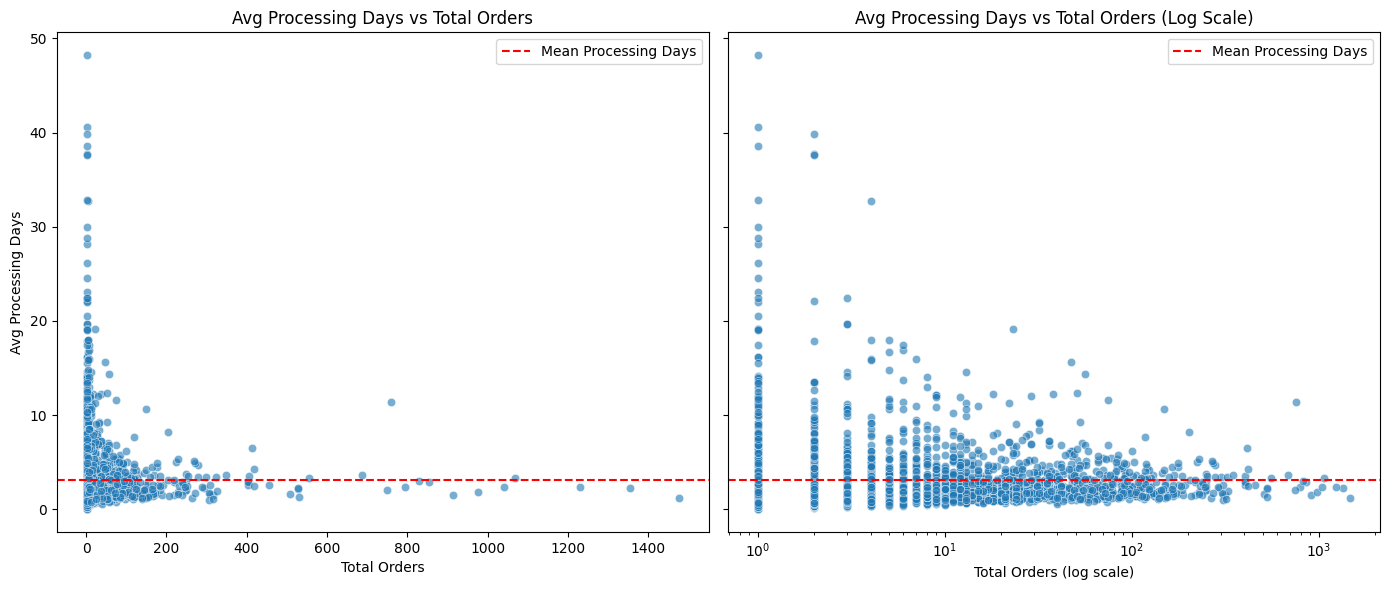

In [ ]:
## 주문 수에 따른 안정성 확인

# 평균 출고일 계산
mean_proc = seller_profile["avg_processing_days"].mean()

fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# 일반 스케일
sns.scatterplot(
    data=seller_profile,
    x="total_orders",
    y="avg_processing_days",
    alpha=0.6,
    ax=axes[0]
)
axes[0].axhline(mean_proc, color="red", linestyle="--", label="Mean Processing Days")
axes[0].set_title("Avg Processing Days vs Total Orders")
axes[0].set_xlabel("Total Orders")
axes[0].set_ylabel("Avg Processing Days")
axes[0].legend()

# 로그 스케일
sns.scatterplot(
    data=seller_profile,
    x="total_orders",
    y="avg_processing_days",
    alpha=0.6,
    ax=axes[1]
)
axes[1].set_xscale("log")
axes[1].axhline(mean_proc, color="red", linestyle="--", label="Mean Processing Days")
axes[1].set_title("Avg Processing Days vs Total Orders (Log Scale)")
axes[1].set_xlabel("Total Orders (log scale)")
axes[1].legend()

plt.tight_layout()
plt.show()


#### **2-3. 시각화: LOWESS 회귀 적용**

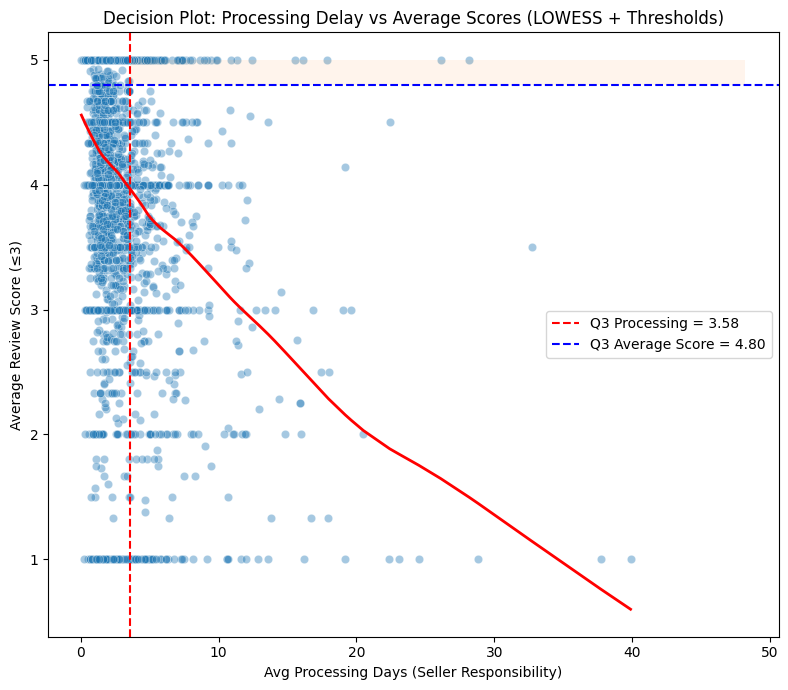

In [ ]:
## 평균 리뷰 점수 vs 출고일
# LOWESS + 기준선

# 1) 기준선(Threshold) 설정: Q3(75%) 권장
x_thr = seller_profile["avg_processing_days"].quantile(0.75)
y_thr = seller_profile["avg_review_score"].quantile(0.75)

plt.figure(figsize=(8,7))

# 2) 산점도
sns.scatterplot(
    data=seller_profile,
    x="avg_processing_days",
    y="avg_review_score",
    alpha=0.4
)

# 3) LOWESS(국소회귀) 추세선
sns.regplot(
    data=seller_profile,
    x="avg_processing_days",
    y="avg_review_score",
    scatter=False,
    lowess=True,
    color="red",
    line_kws={"linewidth": 2}
)

# 4) 기준선(사분면)
plt.axvline(x_thr, color="red", linestyle="--", linewidth=1.5, label=f"Q3 Processing = {x_thr:.2f}")
plt.axhline(y_thr, color="blue", linestyle="--", linewidth=1.5, label=f"Q3 Average Score = {y_thr:.2f}")

# 5) 오른쪽 위(고위험) 영역 강조 (선택)
x_max = seller_profile["avg_processing_days"].max()
y_max = seller_profile["avg_review_score"].max()
plt.fill_betweenx(
    y=[y_thr, y_max],
    x1=x_thr,
    x2=x_max,
    alpha=0.08
)

# 6) 라벨/제목
plt.title("Decision Plot: Processing Delay vs Average Scores (LOWESS + Thresholds)")
plt.xlabel("Avg Processing Days (Seller Responsibility)")
plt.ylabel("Average Review Score (≤3)")
plt.legend()
plt.tight_layout()
plt.show()


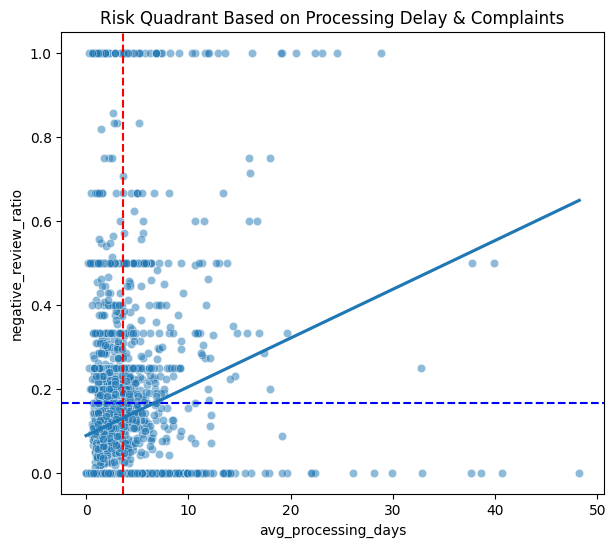

In [ ]:
## 불만족 리뷰 vs 출고일
# 선형회귀 + 기준선

x_thr = seller_profile["avg_processing_days"].quantile(0.75)
y_thr = seller_profile["negative_review_ratio"].quantile(0.75)

plt.figure(figsize=(7,6))
sns.scatterplot(
    data=seller_profile,
    x="avg_processing_days",
    y="negative_review_ratio",
    alpha=0.5
)

plt.axvline(x_thr, color="red", linestyle="--")
plt.axhline(y_thr, color="blue", linestyle="--")

sns.regplot(
    data=seller_profile,
    x="avg_processing_days",
    y="negative_review_ratio",
    scatter=False,
    ci=None
)

plt.title("Risk Quadrant Based on Processing Delay & Complaints")
plt.show()


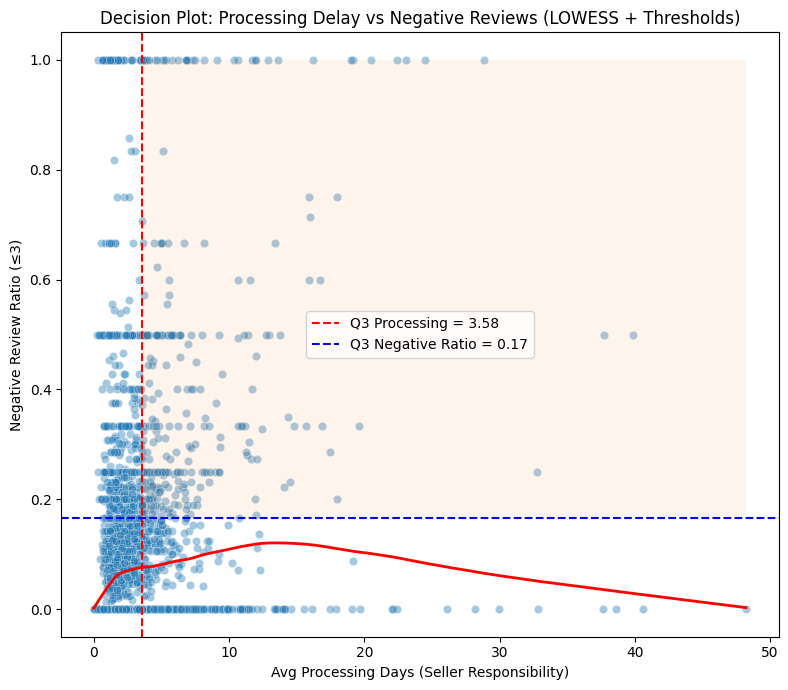

In [ ]:
## 불만족 리뷰 vs 출고일
# LOWESS + 기준선

# 1) 기준선(Threshold) 설정: Q3(75%) 권장
x_thr = seller_profile["avg_processing_days"].quantile(0.75)
y_thr = seller_profile["negative_review_ratio"].quantile(0.75)

plt.figure(figsize=(8,7))

# 2) 산점도
sns.scatterplot(
    data=seller_profile,
    x="avg_processing_days",
    y="negative_review_ratio",
    alpha=0.4
)

# 3) LOWESS(국소회귀) 추세선
sns.regplot(
    data=seller_profile,
    x="avg_processing_days",
    y="negative_review_ratio",
    scatter=False,
    lowess=True,
    color="red",
    line_kws={"linewidth": 2}
)

# 4) 기준선(사분면)
plt.axvline(x_thr, color="red", linestyle="--", linewidth=1.5, label=f"Q3 Processing = {x_thr:.2f}")
plt.axhline(y_thr, color="blue", linestyle="--", linewidth=1.5, label=f"Q3 Negative Ratio = {y_thr:.2f}")

# 5) 오른쪽 위(고위험) 영역 강조 (선택)
x_max = seller_profile["avg_processing_days"].max()
y_max = seller_profile["negative_review_ratio"].max()
plt.fill_betweenx(
    y=[y_thr, y_max],
    x1=x_thr,
    x2=x_max,
    alpha=0.08
)

# 6) 라벨/제목
plt.title("Decision Plot: Processing Delay vs Negative Reviews (LOWESS + Thresholds)")
plt.xlabel("Avg Processing Days (Seller Responsibility)")
plt.ylabel("Negative Review Ratio (≤3)")
plt.legend()
plt.tight_layout()
plt.show()


- 강한 선형관계는 관측되지 않음
- 출고 지연이 큰 판매자 일부에서 불만족 리뷰 비율이 기준치를 초과
- 0 → 약 10일 구간 : 출고 지연일 증가에 따라 평균 불만족 비율이 증가
- 10 ~ 20일 사이부터 하락

=> 출고 지연이 큰 판매자에서 불만족이 감소했다기보다는, 해당 구간의 관측치 구성 변화와 적은 표본수에 따른 평균 효과의 변화로 해석할 수 있음  
=> 이런 비선형적인 그래프가 이상치(유의 판매자) 데이터를 더 잘 반영한다고 생각해볼 수 있지 않을까???

In [ ]:
## 주의 영역 seller 수 구하기

# 1) 기준선 계산 (이미 값이 있으면 그대로 숫자로 넣어도 됨)
x_thr = seller_profile["avg_processing_days"].quantile(0.75)
y_thr = seller_profile["negative_review_ratio"].quantile(0.75)

# 2) 주의 영역(둘 다 초과) 필터
warning_sellers = seller_profile[
    (seller_profile["avg_processing_days"] > x_thr) &
    (seller_profile["negative_review_ratio"] > y_thr)
]

# 3) seller 수
warning_seller_count = warning_sellers["seller_id"].nunique()
warning_seller_count


269

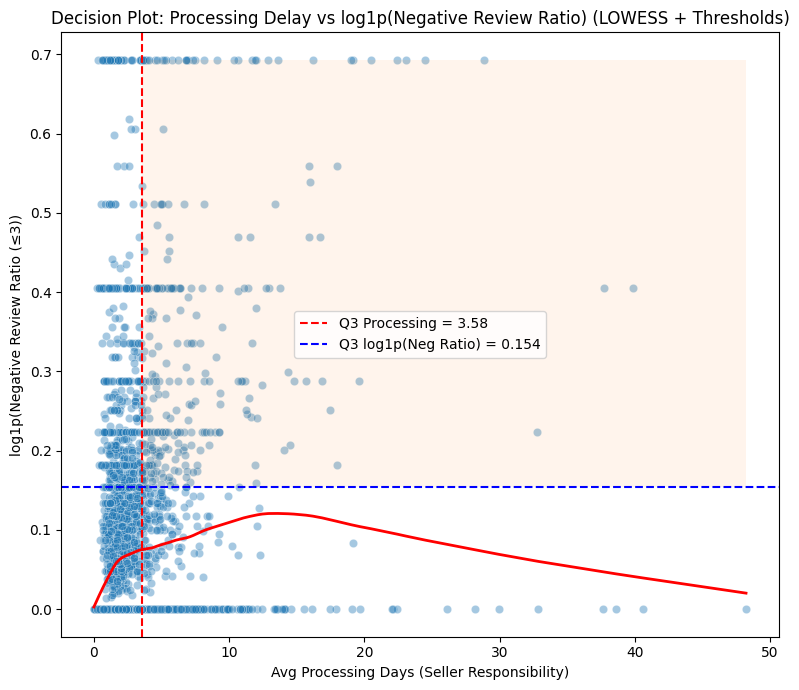

In [ ]:
## log(불만족 리뷰 비율) vs 출고지연일
# 불만족 리뷰 비율을 로그변환한 경우도 비선형적으로 로그변환 하기 전 그래프와 유사한 흐름을 가짐

# 0) 로그 변환 컬럼 생성 (0 포함 가능)
seller_profile = seller_profile.copy()
seller_profile["log_neg_ratio"] = np.log1p(seller_profile["negative_review_ratio"])

# 1) 기준선(Threshold) 설정: Q3(75%)
x_thr = seller_profile["avg_processing_days"].quantile(0.75)
y_thr = seller_profile["log_neg_ratio"].quantile(0.75)

plt.figure(figsize=(8,7))

# 2) 산점도
sns.scatterplot(
    data=seller_profile,
    x="avg_processing_days",
    y="log_neg_ratio",
    alpha=0.4
)

# 3) LOWESS(국소회귀) 추세선
sns.regplot(
    data=seller_profile,
    x="avg_processing_days",
    y="log_neg_ratio",
    scatter=False,
    lowess=True,
    color="red",
    line_kws={"linewidth": 2}
)

# 4) 기준선(사분면)
plt.axvline(
    x_thr, color="red", linestyle="--", linewidth=1.5,
    label=f"Q3 Processing = {x_thr:.2f}"
)
plt.axhline(
    y_thr, color="blue", linestyle="--", linewidth=1.5,
    label=f"Q3 log1p(Neg Ratio) = {y_thr:.3f}"
)

# 5) 오른쪽 위(고위험) 영역 강조
x_max = seller_profile["avg_processing_days"].max()
y_max = seller_profile["log_neg_ratio"].max()
plt.fill_betweenx(
    y=[y_thr, y_max],
    x1=x_thr,
    x2=x_max,
    alpha=0.08
)

# 6) 라벨/제목
plt.title("Decision Plot: Processing Delay vs log1p(Negative Review Ratio) (LOWESS + Thresholds)")
plt.xlabel("Avg Processing Days (Seller Responsibility)")
plt.ylabel("log1p(Negative Review Ratio (≤3))")
plt.legend()
plt.tight_layout()
plt.show()


In [18]:
## 배송/운영 지표와 비교

seller_profile[[
    "avg_review_score",
    "negative_review_ratio",
    #"shipment_delay_ratio",
    "avg_processing_days"
]].corr(method="spearman")


,avg_review_score,negative_review_ratio,avg_processing_days
avg_review_score,1.000000,-0.896274,-0.255491
negative_review_ratio,-0.896274,1.000000,0.202480
avg_processing_days,-0.255491,0.202480,1.000000
